# Principal Component Analysis
Now, we'll apply PCA to reduce the number of dimensions to the data.

Pipeline:
- Scale data
- Run PCA, with >95% explained variance
- Examine transformed dataset
## Why use PCA?
Aureilien Geron, "Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow", 2019
- Speeds up training time
- If you reduce down to 2 dimensions, you can visualize your data
- Can, in some cases, improve performance
## High level explanation of PCA
While high dimensions make for sparse data, real world data is actually usually not spread out uniformly across all dimensions.
- Some features are almost constant
- Many features can be highly correlated

The result is that training instances lie within or close to a lower dimensional subspace of the high dimensional space.

>Consider a visual model of the orbits of the planets around the sun. It may seem like we would need a 3D space to model something like this, but the reality is that the most of the planets orbit around the sun in a relatively flat ellipse; only about 3 degrees of variance. This means that a model of the planets' orbit around the sun can just be *squished* down to 2D without losing much information -- a lower dimensional subspace of the 3D space.

If this space is in 3D, then the subspace is a plane in 2D with two new features, $z_1$ and $z_2$ that act as coordinates of the projections onto the plane (points are projected orthogonally onto the plane).

PCA is effectively used to "squish" the data into lower dimesions, while trying to preserve as much variance as possible (as we learned, variance = information by Shannon entropy).

## Scale the data

In [1]:
from sklearn.preprocessing import StandardScaler
from data_processor import DataProcessor
import pandas as pd

# read and prepare data
dp = DataProcessor()
df = pd.read_csv('../data/train.csv')
train_df = dp.encode_data(df)
print(train_df.shape)

# isolate features from target
y = train_df['SalePrice']
X = train_df.drop('SalePrice', axis=1)
print(X.shape, y.shape)

scaler = StandardScaler().set_output(transform="pandas")
X_scaled = scaler.fit_transform(X)
X_scaled

(1460, 548)
(1460, 547) (1460,)


,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PoolQC
0,0.212877,-0.207142,0.651479,-0.517200,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,...,-0.336488,0.339853,-0.884658,0.303616,-0.409369,0.255978,-0.966583,0.321389,0.302084,-0.064673
1,0.645747,-0.091886,-0.071836,2.179628,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,...,-1.391854,0.339853,-0.884658,0.303616,0.795629,0.255978,1.487697,0.321389,0.302084,-0.064673
2,0.299451,0.073480,0.651479,-0.517200,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,...,-0.336488,0.339853,-0.884658,0.303616,-0.409369,0.255978,1.487697,0.321389,0.302084,-0.064673
3,0.068587,-0.096897,0.651479,-0.517200,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,...,-1.391854,0.339853,0.265476,0.303616,-0.409369,0.255978,0.505985,0.321389,0.302084,-0.064673
4,0.761179,0.375148,1.374795,-0.517200,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,...,-0.336488,0.339853,-0.884658,0.303616,-0.409369,0.255978,1.487697,0.321389,0.302084,-0.064673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.126303,-0.260560,-0.071836,-0.517200,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,...,1.246560,0.339853,-0.884658,0.303616,0.795629,0.255978,1.487697,0.321389,0.302084,-0.064673
1456,0.790037,0.266407,-0.071836,0.381743,0.087911,0.759659,0.722112,0.049262,1.104925,2.355701,...,-1.391854,-0.431819,1.415610,0.303616,0.795629,-3.828474,1.487697,0.321389,0.302084,-0.064673
1457,0.241735,-0.147810,0.651479,3.078570,-0.570750,-0.369871,-0.288653,0.701265,0.215641,0.065656,...,-0.336488,0.339853,-0.884658,0.303616,-0.409369,0.255978,0.505985,0.321389,0.302084,-0.064673
1458,0.299451,-0.080160,-0.795151,0.381743,-0.570750,-0.865548,6.092188,-1.284176,0.046905,-0.218982,...,-0.336488,-0.431819,0.265476,-3.477021,-0.409369,0.255978,-0.966583,0.321389,0.302084,-0.064673


## Perform PCA 
With the goal of an explained variance ratio cumulative sum of 95%

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_scaled_pca = pca.fit_transform(X_scaled)

print(f'{pca.explained_variance_ratio_[:5]} ... {pca.explained_variance_ratio_[-5:]}')
print(f'Number of features: {len(pca.explained_variance_ratio_)}')
print(f'Explained variance ratio: {pca.explained_variance_ratio_.sum()}')

[0.03177932 0.0182005  0.01351974 0.01284642 0.01144591] ... [0.00068797 0.00068362 0.00068122 0.00067994 0.00066814]
Number of features: 318
Explained variance ratio: 0.9505530826929818


This means we can reduce the feature set from 547 to 318, while keeping 95% of the variance contained in the data.

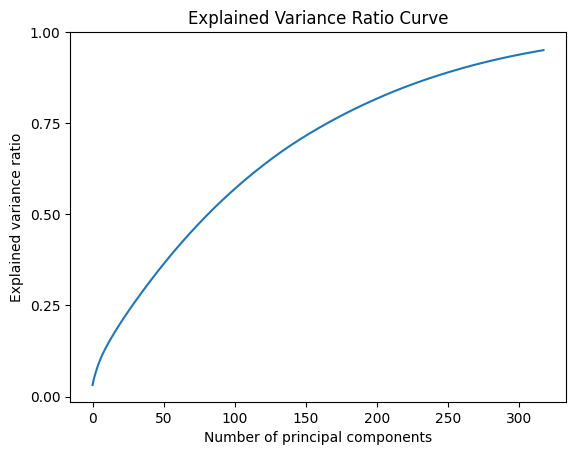

In [3]:
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance ratio')
plt.yticks([0, 0.25, 0.5, 0.75, 1])
plt.title('Explained Variance Ratio Curve')
plt.show()

# Performance Analysis
Here, we'll perform linear regression with the engineered data alone, then with PCA.
## Performance with engineered data
Pipeline:
- Engineer the features
- Scale the data
- Perform linear regression
- Use 10-fold cross validation
- Used normalized root mean squared error as our performance metric

### Read, process, and split target from features

In [4]:
import pandas as pd
from data_processor import DataProcessor

# read and process data
dp = DataProcessor()
df = dp.encode_data(pd.read_csv('../data/train.csv'))
display(df.head())

# split data from target column
target_col = 'SalePrice'
y = df[target_col]
X = df.drop(target_col, axis=1)
display(X, y)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PoolQC,SalePrice
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,5.0,0.0,4.0,2.0,6.0,-1.0,4.0,4.0,-1.0,208500
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,5.0,0.0,4.0,3.0,6.0,4.0,4.0,4.0,-1.0,181500
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,-1.0,223500
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,5.0,2.0,4.0,2.0,6.0,2.0,4.0,4.0,-1.0,140000
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,-1.0,250000


,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PoolQC
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,2.0,5.0,0.0,4.0,2.0,6.0,-1.0,4.0,4.0,-1.0
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,0.0,5.0,0.0,4.0,3.0,6.0,4.0,4.0,4.0,-1.0
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,2.0,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,-1.0
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,0.0,5.0,2.0,4.0,2.0,6.0,2.0,4.0,4.0,-1.0
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,2.0,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,0.0,0,0,953,953,953,...,5.0,5.0,0.0,4.0,3.0,6.0,4.0,4.0,4.0,-1.0
1456,85.0,13175,6,6,119.0,790,163,589,1542,2073,...,0.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,-1.0
1457,66.0,9042,7,9,0.0,275,0,877,1152,1188,...,2.0,5.0,0.0,4.0,2.0,6.0,2.0,4.0,4.0,-1.0
1458,68.0,9717,5,6,0.0,49,1029,0,1078,1078,...,2.0,4.0,2.0,0.0,2.0,6.0,-1.0,4.0,4.0,-1.0


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

### Train linear regression, analyze coefficients
Now, we'll train a linear regression on this data, and analyze coefficients to determine the most important features.

In [5]:
# analysis with linear regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# scale
scaler = StandardScaler().set_output(transform='pandas')
X_scaled = scaler.fit_transform(X)

# train
regr = LinearRegression()
regr.fit(X_scaled, y)

# examine coefficients
print(regr.intercept_)
print(regr.coef_[:10], regr.coef_[-10:])

181342.19163244704
[ 5.43058231e+02  4.65064893e+03  9.13960265e+03  6.56757820e+03
  2.90162346e+03  2.55468274e+17  9.03576600e+16  2.47497174e+17
 -2.45726291e+17 -2.13908838e+15] [  151.125  -618.    -1451.5    -890.    -3062.     3800.    -3048.
   -80.      224.    -7864.   ]


In [6]:
# largest positive and negative correlations
import numpy as np

max_val, min_val = regr.coef_.max(), regr.coef_.min()
# finds first value that matches that max/min value in the list. output is a list of those indices
max_val_idx, min_val_idx = np.where(regr.coef_ == max_val)[0], np.where(regr.coef_ == min_val)[0]

print(regr.coef_[max_val_idx], regr.coef_[min_val_idx])
print(df.columns[max_val_idx[0]], df.columns[min_val_idx[0]])

[4.51995464e+17] [-3.47517024e+17]
LandContour_Lvl BldgType_1Fam


### Design training pipeline, train regression, analyze results

In [7]:
# proper training pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

regr = make_pipeline(StandardScaler(), LinearRegression())
neg_rmse_list = cross_val_score(regr, X, y, cv=10, scoring='neg_root_mean_squared_error')
neg_rmse_list

array([-2.08966381e+17, -1.00692354e+17, -3.68840559e+17, -5.48819089e+16,
       -4.17706474e+16, -3.55394240e+16, -2.47205106e+17, -4.08087545e+16,
       -1.79381444e+17, -4.39348025e+17])

In [8]:
# calculate average rmse
rmse = -neg_rmse_list.mean()
rmse

np.float64(1.7174346040433568e+17)

In [9]:
# normalized
rmse / y.mean()

np.float64(949272193117.5247)

## Performance with engineered data and PCA

In [10]:
display(X, y)

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BsmtFinType1,BsmtFinType2,HeatingQC,Electrical,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PoolQC
0,65.0,8450,7,5,196.0,706,0,150,856,856,...,2.0,5.0,0.0,4.0,2.0,6.0,-1.0,4.0,4.0,-1.0
1,80.0,9600,6,8,0.0,978,0,284,1262,1262,...,0.0,5.0,0.0,4.0,3.0,6.0,4.0,4.0,4.0,-1.0
2,68.0,11250,7,5,162.0,486,0,434,920,920,...,2.0,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,-1.0
3,60.0,9550,7,5,0.0,216,0,540,756,961,...,0.0,5.0,2.0,4.0,2.0,6.0,2.0,4.0,4.0,-1.0
4,84.0,14260,8,5,350.0,655,0,490,1145,1145,...,2.0,5.0,0.0,4.0,2.0,6.0,4.0,4.0,4.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,5,0.0,0,0,953,953,953,...,5.0,5.0,0.0,4.0,3.0,6.0,4.0,4.0,4.0,-1.0
1456,85.0,13175,6,6,119.0,790,163,589,1542,2073,...,0.0,4.0,4.0,4.0,3.0,2.0,4.0,4.0,4.0,-1.0
1457,66.0,9042,7,9,0.0,275,0,877,1152,1188,...,2.0,5.0,0.0,4.0,2.0,6.0,2.0,4.0,4.0,-1.0
1458,68.0,9717,5,6,0.0,49,1029,0,1078,1078,...,2.0,4.0,2.0,0.0,2.0,6.0,-1.0,4.0,4.0,-1.0


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

### Design training pipeline - scale, pca, train regression
For PCA, by passing in a floating point number between 0 and 1 like 0.95, we indicate that we want to continue calculating principal components until 95% of the variance is explained.

In [11]:
regr = make_pipeline(StandardScaler(), PCA(n_components=0.95), LinearRegression())
regr

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.95)),
                ('linearregression', LinearRegression())])

### Train and analyze performance

In [12]:
from sklearn.model_selection import cross_validate

scoring={'neg_rmse': 'neg_root_mean_squared_error', 
         'neg_mape': 'neg_mean_absolute_percentage_error'}
scores = cross_validate(regr, X, y, scoring=scoring, cv=10, return_train_score=True)
print(scores.keys())

dict_keys(['fit_time', 'score_time', 'test_neg_rmse', 'train_neg_rmse', 'test_neg_mape', 'train_neg_mape'])


In [13]:
scores['test_neg_rmse'], scores['test_neg_mape']

(array([-24612.71323004, -28521.39669945, -30597.35869177, -40499.14034118,
        -33985.57304167, -35542.84808322, -27140.23717713, -30783.49224714,
        -62662.36712938, -22553.14881645]),
 array([-0.12991634, -0.11857696, -0.12723864, -0.14408678, -0.13367778,
        -0.12801338, -0.11413107, -0.12967536, -0.13813605, -0.10223082]))

In [14]:
# interpret rmse scores
rmse = -scores['test_neg_rmse'].mean()
nrmse = rmse / y.mean()
percent_nrmse = f'{round(nrmse * 100, 1)}%'

# interpret mape scores
mape = -scores['test_neg_mape'].mean()
percent_mape = f'{round(mape * 100, 1)}%'

f'rmse: {round(rmse)}, normalized rmse: {percent_nrmse}, mape: {percent_mape}'

'rmse: 33690, normalized rmse: 18.6%, mape: 12.7%'

## Analysis
- too many features; or a lot of useless features that distract the line? PCA may have ended up inadvertently removing a lot of noise.
- Or is the choice in feature engineering where the mistake was?

Engineered feature set:
5.51 x 10^16 = 50 000 000 000 000 000
or 30 476 021 330 301 % error

So that's 50 quadrillion, that's hilarious.

PCA, reduced feature set:
33 689
or 18.62% error

Coming to some troubling conclusions:
- PCA doesn't work for one hot encoded data. Going to have to find a way to deal with that, I think this will have my answer: https://towardsdatascience.com/famd-how-to-generalize-pca-to-categorical-and-numerical-data-2ddbeb2b9210
- There doesn't seem to be consensus for starndardizing ordinal data, but I'm going to just do it anyway